# Cartonization
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Digital Image Processing Course

In [132]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [145]:
def cartonization(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_median = cv2.medianBlur(gray_image, 9)

    edges = cv2.adaptiveThreshold(gray_median, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 29, 9)


    color = cv2.bilateralFilter(image, 29, 225, 225)
    cartoon_image = cv2.bitwise_and(color, color, mask=edges)

    # K-Means
    color_map = image.reshape((-1, 3))
    color_map = np.float32(color_map)
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.5)
    _, labels, centers = cv2.kmeans(color_map, 20, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    color_map_clustering = centers[labels.flatten()]
    final_image = color_map_clustering.reshape(image.shape)

    color_k = cv2.bilateralFilter(final_image, 15, 225, 225)
    cartoon_image_k = cv2.bitwise_and(color_k, color_k, mask=edges)


    plt.figure(figsize=(20, 10))
    plt.subplot(231), plt.imshow(image), plt.title('Original')
    plt.subplot(232), plt.imshow(gray_image, cmap='gray'), plt.title('Gray')
    plt.subplot(233), plt.imshow(gray_median, cmap='gray'), plt.title('Smoothing')
    plt.subplot(234), plt.imshow(edges, cmap='gray'), plt.title('Edges')
    plt.subplot(235), plt.imshow(cartoon_image), plt.title('Cartoon')
    plt.subplot(236), plt.imshow(cartoon_image_k), plt.title('Cartoon KMeans')
    plt.show()
    print(image.shape)

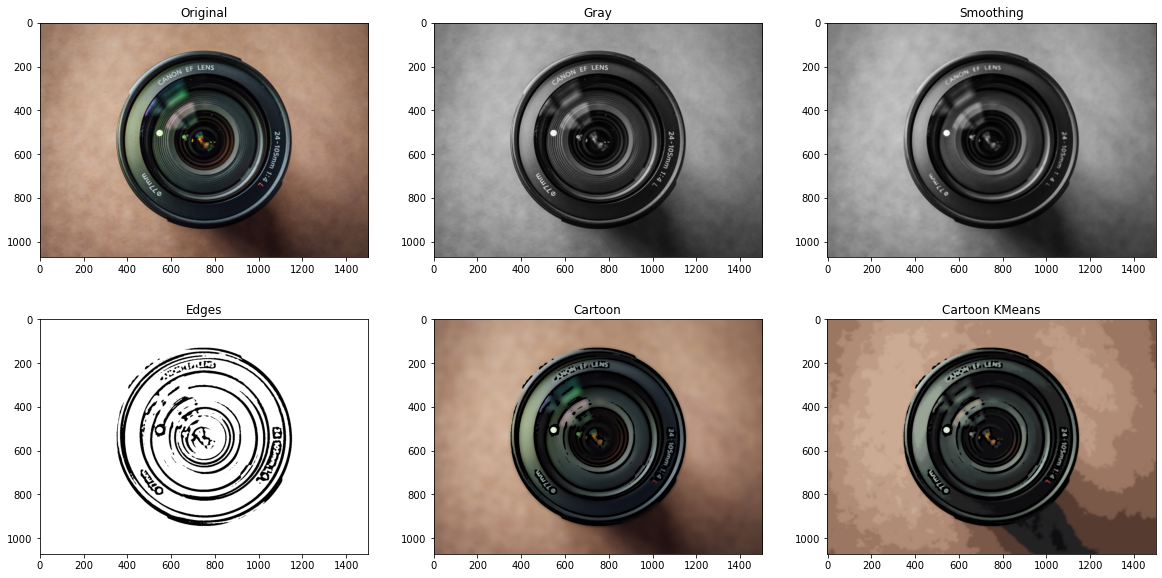

(1072, 1500, 3)


In [146]:
cartonization('Images/img2.jpg')